In [1]:
#import moudules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import cv2
import h5py

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [47]:
float32(1)

NameError: name 'float32' is not defined

In [2]:
fpath = './data/train'

label = []
data = []
count = 0
length = len(os.listdir(fpath))

fpath = "./data/train"
for file in os.listdir(fpath):
    
    #read image
    image = cv2.imread(os.path.join(fpath,file))
    image = cv2.resize(image,(96,96))
    
    #append image to data
    data.append(image/255)
    
    #label "dog" as 1 and "cat" as 0
    if file.startswith("dog"):
        label.append(1)
    else:
        label.append(0)
    
    count += 1
    if count%(length/20) == 0:
    
        print("%d image data retreived (%.1f percent done)"%(count,round(count/length*100,2)))
        
print('complete!!')


    
    
 

1250 image data retreived (5.0 percent done)
2500 image data retreived (10.0 percent done)
3750 image data retreived (15.0 percent done)
5000 image data retreived (20.0 percent done)
6250 image data retreived (25.0 percent done)
7500 image data retreived (30.0 percent done)
8750 image data retreived (35.0 percent done)
10000 image data retreived (40.0 percent done)
11250 image data retreived (45.0 percent done)
12500 image data retreived (50.0 percent done)
13750 image data retreived (55.0 percent done)
15000 image data retreived (60.0 percent done)
16250 image data retreived (65.0 percent done)
17500 image data retreived (70.0 percent done)
18750 image data retreived (75.0 percent done)
20000 image data retreived (80.0 percent done)
21250 image data retreived (85.0 percent done)
22500 image data retreived (90.0 percent done)
23750 image data retreived (95.0 percent done)
25000 image data retreived (100.0 percent done)
complete!!


In [18]:
savepath = './data/save_train'
os.path.join(savepath , 'label')

import csv


#Assuming res is a flat list
with open(os.path.join(savepath, 'label.csv'), "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    for val in label:
        writer.writerow([val])   

#Assuming res is a flat list
with open(os.path.join(savepath , 'data.csv'), "w") as output:
    writer = csv.writer(output, lineterminator='\n')
    count = 0
    length = len(data)
    for val in data:
        writer.writerow([val])
        count +=1
        if count%(length/20) == 0:
    
            print("%d lines saved(%.1f percent done)"%(count,round(count/length*100,2)))
        

1250 lines saved(5.0 percent done)
2500 lines saved(10.0 percent done)
3750 lines saved(15.0 percent done)
5000 lines saved(20.0 percent done)
6250 lines saved(25.0 percent done)
7500 lines saved(30.0 percent done)
8750 lines saved(35.0 percent done)
10000 lines saved(40.0 percent done)
11250 lines saved(45.0 percent done)
12500 lines saved(50.0 percent done)
13750 lines saved(55.0 percent done)
15000 lines saved(60.0 percent done)
16250 lines saved(65.0 percent done)
17500 lines saved(70.0 percent done)
18750 lines saved(75.0 percent done)
20000 lines saved(80.0 percent done)
21250 lines saved(85.0 percent done)
22500 lines saved(90.0 percent done)
23750 lines saved(95.0 percent done)
25000 lines saved(100.0 percent done)


In [3]:
data1 = np.array(data,dtype = 'float32')
data1 = data1.reshape((data1.shape)[0],(data1.shape)[1],(data1.shape)[2],3)
label1 = np.array(label)

input index :  1


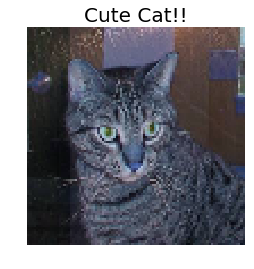

In [51]:
input_index = input("input index : ")
input_index = int(input_index)

pixels = data[input_index]

if label[input_index] == 1:
    specie = "Dog"
else:
    specie = "Cat"
    
    
    
plt.title('Cute ' + specie + '!!',fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

In [29]:
mode12 = Sequential()

In [35]:
model = Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model.add(Conv2D(filters=8, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', activation="relu"))
model.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(16,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()
model.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_134 (Conv2D)          (None, 96, 96, 8)         224       
_________________________________________________________________
conv2d_135 (Conv2D)          (None, 96, 96, 8)         584       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 48, 48, 16)        1168      
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 48, 48, 16)        2320      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 24, 24, 32)        4640      
__________

In [88]:
model2 = Sequential()
model2.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model2.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model2.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model2.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model2.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model2.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model2.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(16,activation="sigmoid"))
model2.add(Dense(1,activation="sigmoid"))
model2.summary()
model2.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_164 (Conv2D)          (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 24, 24, 64)        18496     
__________

In [113]:
model3 = Sequential()
model3.add(Conv2D(filters=8,kernel_size=(3,3),padding = 'valid', input_shape=(96,96,3),activation="relu"))
model3.add(Conv2D(filters=8, kernel_size=(3,3),padding = 'valid',activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', activation="relu"))
model3.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model3.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model3.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model3.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model3.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model3.add(Dropout(0.3))
model3.add(Flatten())
model3.add(Dense(1,activation="sigmoid"))
#model3.add(Dense(16,activation="sigmoid"))
#model3.add(Dense(1,activation="sigmoid"))
model3.summary()
model3.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_194 (Conv2D)          (None, 94, 94, 8)         224       
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 92, 92, 8)         584       
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 46, 46, 8)         0         
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 46, 46, 16)        1168      
_________________________________________________________________
conv2d_197 (Conv2D)          (None, 46, 46, 16)        2320      
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_198 (Conv2D)          (None, 23, 23, 32)        4640      
__________

In [10]:
print (data1.shape)
print (label.shape)

(25000, 96, 96, 3)
(25000,)


In [4]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 10) # 조기종료 콜백함수 정의

In [ ]:
#모델 학습시키기
hist = model.fit(data1,label,validation_split=0.20,epochs=100,batch_size=32,callbacks=[early_stopping])
model.save("cat_dog_classifier.h5")

In [89]:
#모델 학습시키기
hist = model2.fit(data1,label,validation_split=0.20,epochs=100,batch_size=32,callbacks=[early_stopping])
model2.save("cat_dog_classifier2.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 828s 41ms/step - loss: 0.6640 - acc: 0.6216 - val_loss: 0.9828 - val_acc: 0.0000e+00
Epoch 2/100
20000/20000 [==============================] - 822s 41ms/step - loss: 0.6523 - acc: 0.6324 - val_loss: 0.8539 - val_acc: 0.4080
Epoch 3/100
20000/20000 [==============================] - 785s 39ms/step - loss: 0.6053 - acc: 0.6728 - val_loss: 0.9644 - val_acc: 0.2806
Epoch 4/100
20000/20000 [==============================] - 762s 38ms/step - loss: 0.5684 - acc: 0.7051 - val_loss: 0.5923 - val_acc: 0.6082
Epoch 5/100
20000/20000 [==============================] - 766s 38ms/step - loss: 0.5145 - acc: 0.7505 - val_loss: 0.6308 - val_acc: 0.6564
Epoch 6/100
20000/20000 [==============================] - 763s 38ms/step - loss: 0.4612 - acc: 0.7830 - val_loss: 0.9745 - val_acc: 0.4968
Epoch 7/100
20000/20000 [==============================] - 761s 38ms/step - loss: 0.4188 - acc: 0.8107 - va

In [118]:
#모델 학습시키기
hist3 = model3.fit(data1,label,validation_split=0.20,epochs=100,batch_size=32,callbacks=[early_stopping])
model3.save("cat_dog_classifier3.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 404s 20ms/step - loss: 0.6536 - acc: 0.6324 - val_loss: 0.7920 - val_acc: 0.4062
Epoch 2/100
20000/20000 [==============================] - 406s 20ms/step - loss: 0.5812 - acc: 0.6948 - val_loss: 0.7004 - val_acc: 0.5222
Epoch 3/100
20000/20000 [==============================] - 400s 20ms/step - loss: 0.5252 - acc: 0.7359 - val_loss: 0.7320 - val_acc: 0.5860
Epoch 4/100
20000/20000 [==============================] - 385s 19ms/step - loss: 0.4848 - acc: 0.7636 - val_loss: 0.7093 - val_acc: 0.6104
Epoch 5/100
20000/20000 [==============================] - 388s 19ms/step - loss: 0.4383 - acc: 0.7928 - val_loss: 0.6501 - val_acc: 0.6530
Epoch 6/100
20000/20000 [==============================] - 368s 18ms/step - loss: 0.3994 - acc: 0.8152 - val_loss: 0.6750 - val_acc: 0.6876
Epoch 7/100
20000/20000 [==============================] - 370s 18ms/step - loss: 0.3725 - acc: 0.8311 - val_lo

In [15]:
model4 = Sequential()
model4.add(Conv2D(filters=8,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model4.add(Conv2D(filters=8, kernel_size=(3,3),padding = 'same',activation="relu"))
model4.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model4.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', activation="relu"))
model4.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model4.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model4.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model4.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model4.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model4.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model4.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model4.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model4.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model4.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model4.add(Flatten())
model4.add(Dense(16,activation="relu"))
model4.add(Dense(1,activation="sigmoid"))
model4.summary()
model4.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 96, 96, 8)         224       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 96, 96, 8)         584       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 48, 48, 16)        1168      
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 48, 48, 16)        2320      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 24, 24, 32)        4640      
__________

In [16]:
hist4 = model4.fit(data1,label,validation_split=0.20,epochs=100,batch_size=32,callbacks=[early_stopping])
model4.save("cat_dog_classifier4.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 346s 17ms/step - loss: 0.6504 - acc: 0.6374 - val_loss: 0.7726 - val_acc: 0.4348
Epoch 2/100
20000/20000 [==============================] - 337s 17ms/step - loss: 0.5755 - acc: 0.7054 - val_loss: 0.8079 - val_acc: 0.4516
Epoch 3/100
20000/20000 [==============================] - 338s 17ms/step - loss: 0.5237 - acc: 0.7391 - val_loss: 0.8338 - val_acc: 0.5198
Epoch 4/100
20000/20000 [==============================] - 334s 17ms/step - loss: 0.4693 - acc: 0.7724 - val_loss: 0.7435 - val_acc: 0.5776
Epoch 5/100
20000/20000 [==============================] - 339s 17ms/step - loss: 0.4201 - acc: 0.8012 - val_loss: 0.4665 - val_acc: 0.7990
Epoch 6/100
20000/20000 [==============================] - 341s 17ms/step - loss: 0.3819 - acc: 0.8220 - val_loss: 0.4186 - val_acc: 0.8206
Epoch 7/100
20000/20000 [==============================] - 359s 18ms/step - loss: 0.3541 - acc: 0.8401 - val_lo

KeyboardInterrupt: 

In [18]:
model5 = Sequential()
model5.add(Conv2D(filters=8,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model5.add(Conv2D(filters=8, kernel_size=(3,3),padding = 'same',activation="relu"))
model5.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model5.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', activation="relu"))
model5.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model5.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model5.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model5.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model5.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model5.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model5.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model5.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model5.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model5.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model5.add(Flatten())
model5.add(Dense(2304,activation="relu"))
model5.add(Dense(1,activation="sigmoid"))
model5.summary()
model5.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 96, 96, 8)         224       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 96, 96, 8)         584       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 48, 48, 16)        1168      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 48, 48, 16)        2320      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 32)        4640      
__________

In [19]:
hist5 = model5.fit(data1,label,validation_split=0.20,epochs=100,batch_size=32,callbacks=[early_stopping])
model5.save("cat_dog_classifier4.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 394s 20ms/step - loss: 0.6555 - acc: 0.6281 - val_loss: 0.8558 - val_acc: 0.1704
Epoch 2/100
20000/20000 [==============================] - 398s 20ms/step - loss: 3.4763 - acc: 0.6351 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/100
20000/20000 [==============================] - 408s 20ms/step - loss: 4.9585 - acc: 0.6361 - val_loss: 0.6791 - val_acc: 0.5352
Epoch 4/100
20000/20000 [==============================] - 404s 20ms/step - loss: 5.2762 - acc: 0.6308 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/100
20000/20000 [==============================] - 408s 20ms/step - loss: 6.0443 - acc: 0.6250 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/100
20000/20000 [==============================] - 421s 21ms/step - loss: 6.0443 - acc: 0.6250 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/100
20000/20000 [==============================] - 410s 21ms/step - loss: 6.0443 - 

KeyboardInterrupt: 

In [23]:
model6 = Sequential()
model6.add(Conv2D(filters=8,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model6.add(Conv2D(filters=8, kernel_size=(3,3),padding = 'same',activation="relu"))
model6.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model6.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', activation="relu"))
model6.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model6.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model6.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model6.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model6.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model6.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model6.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model6.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model6.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model6.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model6.add(Flatten())
model6.add(Dense(512,activation="relu"))
model6.add(Dense(16,activation="relu"))
model6.add(Dense(1,activation="sigmoid"))
model6.summary()
model6.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 96, 96, 8)         224       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 96, 96, 8)         584       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 48, 48, 16)        1168      
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 48, 48, 16)        2320      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 24, 24, 32)        4640      
__________

In [25]:
hist6 = model6.fit(data1,label,validation_split=0.20,epochs=100,batch_size=32,callbacks=[early_stopping])
model6.save("cat_dog_classifier6.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 367s 18ms/step - loss: 0.6467 - acc: 0.6402 - val_loss: 0.9128 - val_acc: 0.2026
Epoch 2/100
20000/20000 [==============================] - 367s 18ms/step - loss: 0.5709 - acc: 0.7055 - val_loss: 0.6452 - val_acc: 0.6082
Epoch 3/100
20000/20000 [==============================] - 375s 19ms/step - loss: 0.5153 - acc: 0.7398 - val_loss: 0.8206 - val_acc: 0.5520
Epoch 4/100
20000/20000 [==============================] - 370s 19ms/step - loss: 0.4594 - acc: 0.7757 - val_loss: 0.6786 - val_acc: 0.6766
Epoch 5/100
11136/20000 [===============>..............] - ETA: 2:31 - loss: 0.4109 - acc: 0.8054

KeyboardInterrupt: 

In [29]:
model7 = Sequential()
model7.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model7.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model7.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model7.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model7.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model7.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model7.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model7.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model7.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model7.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model7.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model7.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model7.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model7.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model7.add(Flatten())
model7.add(Dense(2304,activation="relu"))
model7.add(Dense(2304,activation="relu"))
model7.add(Dropout(0.3))
model7.add(Dense(1,activation="sigmoid"))
model7.summary()
model7.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 24, 24, 64)        18496     
__________

In [27]:
hist7 = model7.fit(data1,label,validation_split=0.20,epochs=100,batch_size=32,callbacks=[early_stopping])
model7.save("cat_dog_classifier7.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 484s 24ms/step - loss: 0.6619 - acc: 0.6254 - val_loss: 0.8983 - val_acc: 0.1042
Epoch 2/100
20000/20000 [==============================] - 487s 24ms/step - loss: 0.5969 - acc: 0.6825 - val_loss: 0.7767 - val_acc: 0.5186
Epoch 3/100
20000/20000 [==============================] - 488s 24ms/step - loss: 0.5273 - acc: 0.7344 - val_loss: 0.6283 - val_acc: 0.7058
Epoch 4/100
20000/20000 [==============================] - 485s 24ms/step - loss: 0.4681 - acc: 0.7728 - val_loss: 0.5093 - val_acc: 0.8000
Epoch 5/100
20000/20000 [==============================] - 486s 24ms/step - loss: 0.4227 - acc: 0.7964 - val_loss: 0.5179 - val_acc: 0.7634
Epoch 6/100
20000/20000 [==============================] - 482s 24ms/step - loss: 0.3854 - acc: 0.8198 - val_loss: 0.5427 - val_acc: 0.7584
Epoch 7/100
20000/20000 [==============================] - 481s 24ms/step - loss: 0.3481 - acc: 0.8424 - val_lo

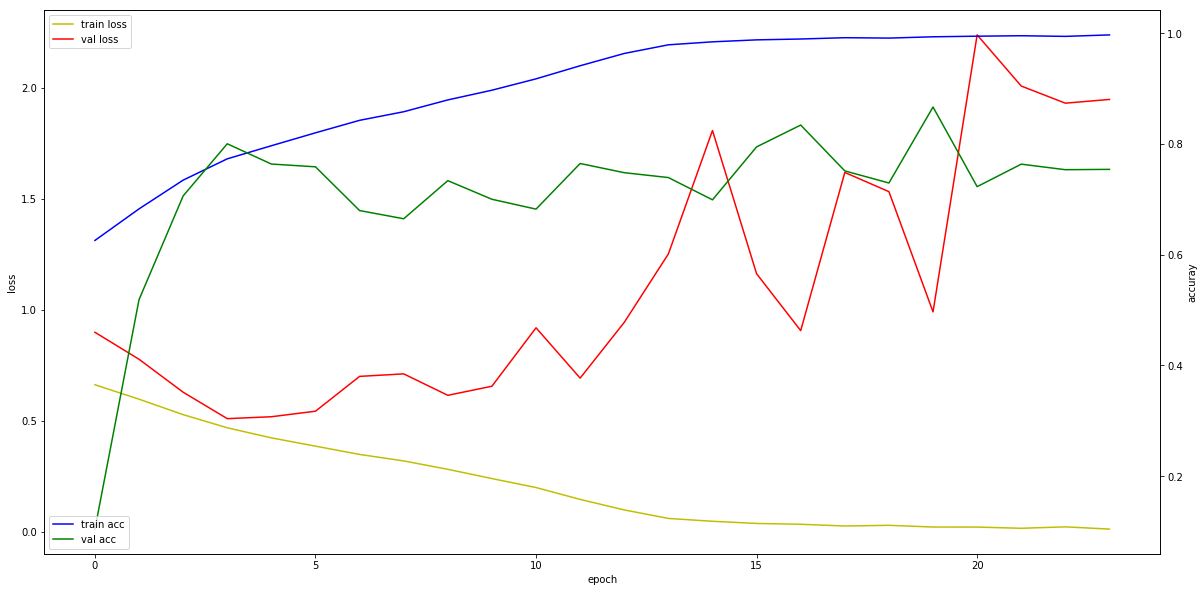

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (20,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist7.history['loss'][:36], 'y', label='train loss')
loss_ax.plot(hist7.history['val_loss'][:36], 'r', label='val loss')

acc_ax.plot(hist7.history['acc'][:36], 'b', label='train acc')
acc_ax.plot(hist7.history['val_acc'][:36], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [18]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 33) # 조기종료 콜백함수 정의

In [20]:
model8 = Sequential()
model8.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model8.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model8.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model8.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model8.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model8.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model8.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model8.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model8.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model8.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model8.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model8.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model8.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model8.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model8.add(Flatten())
model8.add(Dense(4608,activation="relu"))
model8.add(Dense(4608,activation="relu"))
model8.add(Dense(4608,activation="relu"))
model8.add(Dropout(0.4))
model8.add(Dense(1,activation="sigmoid"))
model8.summary()
model8.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 24, 24, 64)        18496     
__________

In [22]:
hist8_2 = model8.fit(data1,label,validation_split=0.20,epochs=100,batch_size=64,callbacks=[early_stopping])
model8.save("cat_dog_classifier8.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 977s 49ms/step - loss: 0.6600 - acc: 0.6239 - val_loss: 1.1602 - val_acc: 0.0000e+00
Epoch 2/100
20000/20000 [==============================] - 891s 45ms/step - loss: 0.6346 - acc: 0.6402 - val_loss: 0.8922 - val_acc: 0.4920
Epoch 3/100
20000/20000 [==============================] - 887s 44ms/step - loss: 0.5949 - acc: 0.6870 - val_loss: 0.7676 - val_acc: 0.5322
Epoch 4/100
20000/20000 [==============================] - 888s 44ms/step - loss: 0.5274 - acc: 0.7405 - val_loss: 1.1661 - val_acc: 0.3192
Epoch 5/100
20000/20000 [==============================] - 889s 44ms/step - loss: 0.4736 - acc: 0.7751 - val_loss: 0.4705 - val_acc: 0.7404
Epoch 6/100
20000/20000 [==============================] - 886s 44ms/step - loss: 0.4144 - acc: 0.8119 - val_loss: 0.7463 - val_acc: 0.6178
Epoch 7/100
20000/20000 [==============================] - 881s 44ms/step - loss: 0.3560 - acc: 0.8429 - va

In [16]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience = 10) # 조기종료 콜백함수 정의

In [29]:
hist8_2 = model8.fit(data1,label,validation_split=0.20,epochs=100,batch_size=64,callbacks=[early_stopping])
model8.save("cat_dog_classifier8.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
  256/20000 [..............................] - ETA: 14:22 - loss: 1.4523e-05 - acc: 1.0000

KeyboardInterrupt: 

In [30]:
model9 = Sequential()
model9.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model9.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model9.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model9.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model9.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model9.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model9.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model9.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model9.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model9.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model9.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model9.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model9.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model9.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model9.add(Dropout(0.5))
model9.add(Flatten())
model9.add(Dense(128,activation="relu"))
model9.add(Dropout(0.5))
model9.add(Dense(128,activation="relu"))
model9.add(Dropout(0.5))
model9.add(Dense(128,activation="relu"))
model9.add(Dropout(0.5))
model9.add(Dense(1,activation="sigmoid"))
model9.summary()
model9.compile(optimizer="adadelta",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 24, 24, 64)        18496     
__________

In [31]:
hist9 = model9.fit(data1,label,validation_split=0.20,epochs=100,batch_size=64,callbacks=[early_stopping])
model9.save("cat_dog_classifier9.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 552s 28ms/step - loss: 0.6653 - acc: 0.6246 - val_loss: 1.0160 - val_acc: 0.0000e+00
Epoch 2/100
20000/20000 [==============================] - 550s 27ms/step - loss: 0.6609 - acc: 0.6250 - val_loss: 0.9276 - val_acc: 0.0000e+00
Epoch 3/100
20000/20000 [==============================] - 558s 28ms/step - loss: 0.6545 - acc: 0.6250 - val_loss: 0.9716 - val_acc: 0.0000e+00
Epoch 4/100
20000/20000 [==============================] - 555s 28ms/step - loss: 0.6472 - acc: 0.6250 - val_loss: 1.2539 - val_acc: 0.0000e+00
Epoch 5/100
20000/20000 [==============================] - 554s 28ms/step - loss: 0.6346 - acc: 0.6254 - val_loss: 0.7978 - val_acc: 0.5108
Epoch 6/100
20000/20000 [==============================] - 540s 27ms/step - loss: 0.6159 - acc: 0.6583 - val_loss: 0.8726 - val_acc: 0.3704
Epoch 7/100
20000/20000 [==============================] - 652s 33ms/step - loss: 0.5755 - acc:

In [32]:
hist9_2 = model9.fit(data1,label,validation_split=0.20,epochs=100,batch_size=64,callbacks=[early_stopping])
model9.save("cat_dog_classifier9.h5")

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 711s 36ms/step - loss: 0.0814 - acc: 0.9700 - val_loss: 0.7763 - val_acc: 0.8330
Epoch 2/100
20000/20000 [==============================] - 622s 31ms/step - loss: 0.0693 - acc: 0.9750 - val_loss: 1.6215 - val_acc: 0.6720
Epoch 3/100
20000/20000 [==============================] - 506s 25ms/step - loss: 0.0709 - acc: 0.9750 - val_loss: 1.3670 - val_acc: 0.7746
Epoch 4/100
20000/20000 [==============================] - 531s 27ms/step - loss: 0.0676 - acc: 0.9775 - val_loss: 0.7949 - val_acc: 0.7984
Epoch 5/100
20000/20000 [==============================] - 524s 26ms/step - loss: 0.0681 - acc: 0.9770 - val_loss: 1.1118 - val_acc: 0.7554
Epoch 6/100
20000/20000 [==============================] - 531s 27ms/step - loss: 0.0607 - acc: 0.9782 - val_loss: 0.8754 - val_acc: 0.8340
Epoch 7/100
20000/20000 [==============================] - 540s 27ms/step - loss: 0.0521 - acc: 0.9822 - val_lo

In [65]:
hist2.history['acc']

[0.9837,
 0.98345,
 0.9855,
 0.98565,
 0.9871,
 0.987,
 0.9886,
 0.98815,
 0.98855,
 0.9861,
 0.98835,
 0.98885,
 0.98915,
 0.9907]

In [95]:
hist2.history['acc'][:2]

[0.9837, 0.98345]

In [43]:
model10 = Sequential()
model10.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model10.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model10.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model10.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model10.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model10.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model10.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model10.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model10.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model10.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model10.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model10.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model10.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model10.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model10.add(Dropout(0.5))
model10.add(Flatten())
model10.add(Dense(128,activation="relu"))
model10.add(Dropout(0.5))
model10.add(Dense(128,activation="relu"))
model10.add(Dropout(0.5))
model10.add(Dense(128,activation="relu"))
model10.add(Dropout(0.5))
model10.add(Dense(1,activation="sigmoid"))
model10.summary()
model10.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 24, 24, 64)        18496     
__________

In [44]:
hist10 = model10.fit(data1,label1,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model10.save("cat_dog_classifier10.h5")

Train on 17500 samples, validate on 7500 samples
Epoch 1/100
17500/17500 [==============================] - 533s 30ms/step - loss: 0.6095 - acc: 0.7121 - val_loss: 1.2009 - val_acc: 0.0000e+00
Epoch 2/100
17500/17500 [==============================] - 531s 30ms/step - loss: 0.6001 - acc: 0.7143 - val_loss: 1.2010 - val_acc: 0.0000e+00
Epoch 3/100
17500/17500 [==============================] - 539s 31ms/step - loss: 0.5998 - acc: 0.7143 - val_loss: 1.1818 - val_acc: 0.0000e+00
Epoch 4/100
17500/17500 [==============================] - 564s 32ms/step - loss: 0.6005 - acc: 0.7143 - val_loss: 1.1881 - val_acc: 0.0000e+00
Epoch 5/100
17500/17500 [==============================] - 561s 32ms/step - loss: 0.6005 - acc: 0.7143 - val_loss: 1.3308 - val_acc: 0.0000e+00
Epoch 6/100
 7616/17500 [============>.................] - ETA: 4:31 - loss: 0.6035 - acc: 0.7103

KeyboardInterrupt: 

In [22]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
datagen = ImageDataGenerator(rotation_range=30,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.3,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  fill_mode='nearest')
                                

gen_train_sets = []
i= 0
for x,y in datagen.flow(data1,label1,batch_size = 25000):
    data_gen, label_gen = x,y
    gen_train_sets.append((data_gen,label_gen))
    i = i + 1
    if i > 1:
        break
        
data2 = gen_train_sets[0][0]
label2 = gen_train_sets[0][1]

data3 = gen_train_sets[1][0]
label3 = gen_train_sets[1][1]

In [34]:
label1[0]

0

In [109]:
import numpy as np

# 랜덤시드 고정시키기
np.random.seed(5)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
datagen = ImageDataGenerator(rotation_range=30,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.3,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  fill_mode='nearest')
                                
test_idx = 2720
data1_test = data1[test_idx:test_idx+1]
label1_test = label1[test_idx:test_idx+1]
gen_train_sets = []
i= 0
for x,y in datagen.flow(data1_test,label1_test,batch_size = 1):
    data_gen_test, label_gen_test = x,y
    gen_train_sets.append((data_gen_test,label_gen_test))
    i = i + 1
    if i > 1:
        break
        
data2_test = gen_train_sets[0][0]
label2_test = gen_train_sets[0][1]

data3_test = gen_train_sets[1][0]
label3_test = gen_train_sets[1][1]

In [42]:
label3_test

array([0])

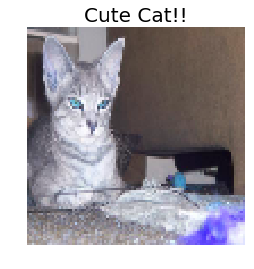

In [110]:

pixels = data1_test[0]
if label1_test[0] == 1:
    specie = "Dog"
else:
    specie = "Cat"
    
    
    
plt.title('Cute ' + specie + '!!',fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

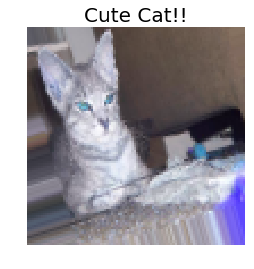

In [111]:

pixels = data2_test[0]
if label2_test[0] == 1:
    specie = "Dog"
else:
    specie = "Cat"
    
    
    
plt.title('Cute ' + specie + '!!',fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

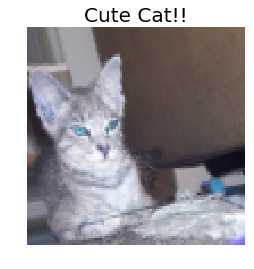

In [112]:
pixels = data3_test[0]
if label3_test[0] == 1:
    specie = "Dog"
else:
    specie = "Cat"
    
    
    
plt.title('Cute ' + specie + '!!',fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

In [23]:
data_tripled = np.concatenate((data1,data2,data3),axis=0)
label_tripled = np.concatenate((label1,label2,label3),axis=0)


In [31]:
from keras import optimizers

In [42]:
model10_1 = Sequential()
model10_1.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model10_1.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model10_1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model10_1.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model10_1.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model10_1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model10_1.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model10_1.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model10_1.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model10_1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model10_1.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model10_1.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model10_1.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model10_1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model10_1.add(Dropout(0.5))
model10_1.add(Flatten())
model10_1.add(Dense(128,activation="relu"))
model10_1.add(Dense(128,activation="relu"))
model10_1.add(Dense(128,activation="relu"))
model10_1.add(Dropout(0.5))
model10_1.add(Dense(1,activation="sigmoid"))
model10_1.summary()
model10_1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 24, 24, 64)        18496     
__________

In [ ]:
hist10_1 = model10_1.fit(data1,label1,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model10_1.save("cat_dog_classifier10_1.h5")

In [ ]:
# default parameters
optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

adam = optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adam2 = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adam3 = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [41]:
model11 = Sequential()
model11.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model11.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model11.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model11.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model11.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model11.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model11.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model11.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model11.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model11.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model11.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11.add(Dropout(0.5))
model11.add(Flatten())
model11.add(Dense(128,activation="relu"))
model11.add(Dense(128,activation="relu"))
model11.add(Dense(128,activation="relu"))
model11.add(Dropout(0.5))
model11.add(Dense(1,activation="sigmoid"))
model11.summary()
adam = optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model11.compile(optimizer=adam,loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 24, 24, 64)        18496     
__________

In [33]:
hist11 = model11.fit(data1,label1,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model11.save("cat_dog_classifier11.h5")

Train on 17500 samples, validate on 7500 samples
Epoch 1/100
17500/17500 [==============================] - 548s 31ms/step - loss: 0.6083 - acc: 0.7124 - val_loss: 1.1943 - val_acc: 0.0000e+00
Epoch 2/100
17500/17500 [==============================] - 534s 30ms/step - loss: 0.6004 - acc: 0.7143 - val_loss: 1.2018 - val_acc: 0.0000e+00
Epoch 3/100
17500/17500 [==============================] - 534s 30ms/step - loss: 0.6005 - acc: 0.7143 - val_loss: 1.2611 - val_acc: 0.0000e+00
Epoch 4/100
17500/17500 [==============================] - 552s 32ms/step - loss: 0.5999 - acc: 0.7143 - val_loss: 1.2744 - val_acc: 0.0000e+00
Epoch 5/100
17500/17500 [==============================] - 519s 30ms/step - loss: 0.5991 - acc: 0.7143 - val_loss: 1.2445 - val_acc: 0.0000e+00
Epoch 6/100
17500/17500 [==============================] - 517s 30ms/step - loss: 0.5997 - acc: 0.7143 - val_loss: 1.1951 - val_acc: 0.0000e+00
Epoch 7/100
17500/17500 [==============================] - 522s 30ms/step - loss: 0.598

KeyboardInterrupt: 

In [34]:
model11_1 = Sequential()
model11_1.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model11_1.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11_1.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model11_1.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11_1.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_1.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_1.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11_1.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_1.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_1.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_1.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11_1.add(Flatten())
model11_1.add(Dense(128,activation="relu"))
model11_1.add(Dense(128,activation="relu"))
model11_1.add(Dense(128,activation="relu"))
model11_1.add(Dense(1,activation="sigmoid"))
model11_1.summary()
adam2 = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model11_1.compile(optimizer=adam2,loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 64)        18496     
__________

In [40]:
hist11_1 = model11_1.fit(data1,label1,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model11_1.save("cat_dog_classifier11_1.h5")

Train on 17500 samples, validate on 7500 samples
Epoch 1/100
 1216/17500 [=>............................] - ETA: 7:15 - loss: 4.6790 - acc: 0.7097

KeyboardInterrupt: 

In [50]:
model11_2 = Sequential()
model11_2.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model11_2.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11_2.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model11_2.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11_2.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_2.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_2.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11_2.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_2.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_2.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model11_2.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model11_2.add(Flatten())
model11_2.add(Dense(128,activation="relu"))
model11_2.add(Dense(128,activation="relu"))
model11_2.add(Dense(128,activation="relu"))
model11_2.add(Dense(1,activation="sigmoid"))
model11_2.summary()
adam3 = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model11_2.compile(optimizer=adam2,loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 24, 24, 64)        18496     
__________

In [51]:
hist11_2 = model11_2.fit(data1,label1,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model11_2.save("cat_dog_classifier11_2.h5")

Train on 17500 samples, validate on 7500 samples
Epoch 1/100
17500/17500 [==============================] - 560s 32ms/step - loss: 4.5930 - acc: 0.7125 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/100
17500/17500 [==============================] - 557s 32ms/step - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/100
17500/17500 [==============================] - 567s 32ms/step - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/100
17500/17500 [==============================] - 561s 32ms/step - loss: 4.6052 - acc: 0.7143 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/100
  576/17500 [..............................] - ETA: 7:52 - loss: 4.7851 - acc: 0.7031

KeyboardInterrupt: 

In [38]:
model12 = Sequential()
model12.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model12.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model12.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model12.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model12.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model12.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model12.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model12.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model12.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model12.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model12.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model12.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model12.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model12.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model12.add(Dropout(0.5))
model12.add(Flatten())
model12.add(Dense(128,activation="relu"))
model12.add(Dense(128,activation="relu"))
model12.add(Dense(128,activation="relu"))
model12.add(Dropout(0.5))
model12.add(Dense(1,activation="sigmoid"))
model12.summary()
model12.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 24, 24, 64)        18496     
__________

In [52]:
hist12 = model12.fit(data1,label1,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model12.save("cat_dog_classifier12.h5")

Train on 17500 samples, validate on 7500 samples
Epoch 1/100
17500/17500 [==============================] - 583s 33ms/step - loss: 0.6184 - acc: 0.7143 - val_loss: 1.1728 - val_acc: 0.0000e+00
Epoch 2/100
17500/17500 [==============================] - 569s 33ms/step - loss: 0.5999 - acc: 0.7143 - val_loss: 1.2477 - val_acc: 0.0000e+00
Epoch 3/100
17500/17500 [==============================] - 576s 33ms/step - loss: 0.5990 - acc: 0.7143 - val_loss: 1.2458 - val_acc: 0.0000e+00
Epoch 4/100
17500/17500 [==============================] - 570s 33ms/step - loss: 0.5993 - acc: 0.7143 - val_loss: 1.2619 - val_acc: 0.0000e+00
Epoch 5/100
 8320/17500 [=============>................] - ETA: 4:28 - loss: 0.6033 - acc: 0.7099

KeyboardInterrupt: 

In [8]:
model13 = Sequential()
model13.add(Conv2D(filters=8,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model13.add(Conv2D(filters=8, kernel_size=(3,3),padding = 'same',activation="relu"))
model13.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model13.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', activation="relu"))
model13.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model13.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model13.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model13.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model13.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model13.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model13.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model13.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model13.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model13.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model13.add(Dropout(0.5))
model13.add(Flatten())
model13.add(Dense(1,activation="sigmoid"))
model13.summary()
model13.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 96, 96, 8)         224       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 96, 96, 8)         584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 16)        1168      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 48, 48, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 24, 24, 32)        4640      
__________

In [9]:
hist13 = model13.fit(data1,label1,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model13.save("cat_dog_classifier13.h5")

Train on 17500 samples, validate on 7500 samples
Epoch 1/100
17500/17500 [==============================] - 291s 17ms/step - loss: 0.5940 - acc: 0.7131 - val_loss: 1.2367 - val_acc: 0.0000e+00
Epoch 2/100
17500/17500 [==============================] - 292s 17ms/step - loss: 0.5654 - acc: 0.7201 - val_loss: 1.1230 - val_acc: 0.0113
Epoch 3/100
17500/17500 [==============================] - 289s 17ms/step - loss: 0.5325 - acc: 0.7453 - val_loss: 1.0512 - val_acc: 0.2251
Epoch 4/100
17500/17500 [==============================] - 290s 17ms/step - loss: 0.4990 - acc: 0.7664 - val_loss: 0.9419 - val_acc: 0.3931
Epoch 5/100
17500/17500 [==============================] - 286s 16ms/step - loss: 0.4602 - acc: 0.7914 - val_loss: 0.7875 - val_acc: 0.5649
Epoch 6/100
17500/17500 [==============================] - 288s 16ms/step - loss: 0.4306 - acc: 0.8029 - val_loss: 0.9800 - val_acc: 0.4639
Epoch 7/100
17500/17500 [==============================] - 288s 16ms/step - loss: 0.3930 - acc: 0.8237 - va

In [14]:
import pickle

In [15]:
with open('history_model13.pickle', 'wb') as handle:
    pickle.dump(hist13, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
model14 = Sequential()
model14.add(Conv2D(filters=8,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model14.add(Conv2D(filters=8, kernel_size=(3,3),padding = 'same',activation="relu"))
model14.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model14.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', activation="relu"))
model14.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model14.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model14.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model14.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model14.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model14.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model14.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model14.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model14.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model14.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model14.add(Flatten())
model14.add(Dense(1,activation="sigmoid"))
model14.summary()
model14.compile(optimizer="sgd",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 96, 96, 8)         224       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 96, 96, 8)         584       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 48, 48, 16)        1168      
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 48, 48, 16)        2320      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 32)        4640      
__________

In [19]:
hist14 = model14.fit(data1,label1,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model14.save("cat_dog_classifier14.h5")

Train on 17500 samples, validate on 7500 samples
Epoch 1/100
17500/17500 [==============================] - 278s 16ms/step - loss: 0.6155 - acc: 0.7095 - val_loss: 1.2516 - val_acc: 0.0000e+00
Epoch 2/100
17500/17500 [==============================] - 266s 15ms/step - loss: 0.5988 - acc: 0.7143 - val_loss: 1.2356 - val_acc: 0.0000e+00
Epoch 3/100
17500/17500 [==============================] - 276s 16ms/step - loss: 0.5980 - acc: 0.7143 - val_loss: 1.2262 - val_acc: 0.0000e+00
Epoch 4/100
17500/17500 [==============================] - 320s 18ms/step - loss: 0.5970 - acc: 0.7143 - val_loss: 1.2043 - val_acc: 0.0000e+00
Epoch 5/100
17500/17500 [==============================] - 340s 19ms/step - loss: 0.5951 - acc: 0.7143 - val_loss: 1.2404 - val_acc: 0.0000e+00
Epoch 6/100
17500/17500 [==============================] - 337s 19ms/step - loss: 0.5904 - acc: 0.7143 - val_loss: 1.1191 - val_acc: 0.0000e+00
Epoch 7/100
17500/17500 [==============================] - 339s 19ms/step - loss: 0.580

In [20]:
with open('history_model14.pickle', 'wb') as handle:
    pickle.dump(hist14, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [28]:
model15 = Sequential()
model15.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model15.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model15.add(Conv2D(filters=32,kernel_size=(3,3),padding = 'same', activation="relu"))
model15.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model15.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model15.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(Conv2D(filters=128, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model15.add(Flatten())
model15.add(Dense(1,activation="sigmoid"))
model15.summary()
model15.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 96, 96, 16)        448       
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 48, 48, 32)        4640      
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 24, 24, 64)        18496     
__________

In [30]:
model15 = Sequential()
model15.add(Conv2D(filters=8,kernel_size=(3,3),padding = 'same', input_shape=(96,96,3),activation="relu"))
model15.add(Conv2D(filters=8, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model15.add(Conv2D(filters=16,kernel_size=(3,3),padding = 'same', activation="relu"))
model15.add(Conv2D(filters=16, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model15.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(Conv2D(filters=32, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model15.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(Conv2D(filters=64, kernel_size=(3,3),padding = 'same',activation="relu"))
model15.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model15.add(Flatten())
model15.add(Dense(1,activation="sigmoid"))
model15.summary()
model15.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_111 (Conv2D)          (None, 96, 96, 8)         224       
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 96, 96, 8)         584       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 48, 48, 8)         0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 48, 48, 16)        1168      
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 48, 48, 16)        2320      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 24, 24, 32)        4640      
__________

In [117]:
len(data1)

25000

In [118]:
len(data_tripled)

75000

In [31]:
hist15 = model15.fit(data_tripled,label_tripled,
                     validation_split=0.30,
                     epochs=100,batch_size=64,
                     callbacks=[early_stopping])
model15.save("cat_dog_classifier15.h5")

Train on 52500 samples, validate on 22500 samples
Epoch 1/100
52500/52500 [==============================] - 969s 18ms/step - loss: 0.6369 - acc: 0.6320 - val_loss: 0.5775 - val_acc: 0.7002
Epoch 2/100
52500/52500 [==============================] - 912s 17ms/step - loss: 0.5242 - acc: 0.7406 - val_loss: 0.4782 - val_acc: 0.7723
Epoch 3/100
52500/52500 [==============================] - 910s 17ms/step - loss: 0.4431 - acc: 0.7934 - val_loss: 0.4587 - val_acc: 0.7824
Epoch 4/100
52500/52500 [==============================] - 983s 19ms/step - loss: 0.3926 - acc: 0.8215 - val_loss: 0.4176 - val_acc: 0.8080
Epoch 5/100
52500/52500 [==============================] - 974s 19ms/step - loss: 0.3531 - acc: 0.8423 - val_loss: 0.3748 - val_acc: 0.8266
Epoch 6/100
52500/52500 [==============================] - 947s 18ms/step - loss: 0.3212 - acc: 0.8577 - val_loss: 0.3671 - val_acc: 0.8309
Epoch 7/100
52500/52500 [==============================] - 981s 19ms/step - loss: 0.2880 - acc: 0.8756 - val_l

In [5]:
# 모델 불러오기

from keras.models import load_model
#model15 = load_model("cat_dog_classifier15.h5")
model15_2 = load_model("cat_dog_classifier15_2.h5")

In [5]:
import numpy as np
#한번더 부풀리기

# 랜덤시드 고정시키기
np.random.seed(20)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
datagen = ImageDataGenerator(rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.5,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  fill_mode='nearest')
                                

gen_train_sets2 = []
i= 0
for x,y in datagen.flow(data1,label1,batch_size = 25000):
    data_gen, label_gen = x,y
    gen_train_sets2.append((data_gen,label_gen))
    i = i + 1
    if i > 2:
        break
        
data4 = gen_train_sets2[0][0]
label4 = gen_train_sets2[0][1]

data5 = gen_train_sets2[1][0]
label5 = gen_train_sets2[1][1]

data6 = gen_train_sets2[2][0]
label6 = gen_train_sets2[2][1]

In [46]:
del label_tripled2

In [43]:
whos

Variable             Type                  Data/Info
----------------------------------------------------
Conv2D               type                  <class 'keras.layers.convolutional.Conv2D'>
Dense                type                  <class 'keras.layers.core.Dense'>
Dropout              type                  <class 'keras.layers.core.Dropout'>
EarlyStopping        type                  <class 'keras.callbacks.EarlyStopping'>
Flatten              type                  <class 'keras.layers.core.Flatten'>
ImageDataGenerator   type                  <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
MaxPooling2D         type                  <class 'keras.layers.pooling.MaxPooling2D'>
Sequential           type                  <class 'keras.engine.sequential.Sequential'>
acc_ax               AxesSubplot           AxesSubplot(0.125,0.125;0.775x0.755)
array_to_img         function              <function array_to_img at 0x000002A6EE6FC488>
count                int                   250

In [136]:
del data_tripled

NameError: name 'data_tripled' is not defined

In [8]:
data_tripled2 = np.concatenate((data4,data5,data6),axis=0)
label_tripled2 = np.concatenate((label4,label5,label6),axis=0)

In [74]:
pixels = data_gen[25667]
if label_tripled2[0] == 1:
    specie = "Dog"
else:
    specie = "Cat"
    
    
    
plt.title('Cute ' + specie + '!!',fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

IndexError: index 25667 is out of bounds for axis 0 with size 10000

In [22]:
hist15.history

NameError: name 'hist15' is not defined

In [153]:
with open('history_model15.pickle', 'wb') as handle:
    pickle.dump(hist15, handle, protocol=pickle.HIGHEST_PROTOCOL)

MemoryError: 

In [20]:
hist15_2 = model15.fit(data_tripled2,label_tripled2,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model15.save("cat_dog_classifier15_2.h5")

Train on 52500 samples, validate on 22500 samples
Epoch 1/100
52500/52500 [==============================] - 943s 18ms/step - loss: 0.3490 - acc: 0.8453 - val_loss: 0.3343 - val_acc: 0.8520
Epoch 2/100
52500/52500 [==============================] - 877s 17ms/step - loss: 0.2988 - acc: 0.8688 - val_loss: 0.3153 - val_acc: 0.8644
Epoch 3/100
52500/52500 [==============================] - 849s 16ms/step - loss: 0.2754 - acc: 0.8803 - val_loss: 0.2962 - val_acc: 0.8670
Epoch 4/100
52500/52500 [==============================] - 954s 18ms/step - loss: 0.2521 - acc: 0.8913 - val_loss: 0.3011 - val_acc: 0.8703
Epoch 5/100
52500/52500 [==============================] - 834s 16ms/step - loss: 0.2361 - acc: 0.8991 - val_loss: 0.2965 - val_acc: 0.8700
Epoch 6/100
52500/52500 [==============================] - 826s 16ms/step - loss: 0.2199 - acc: 0.9049 - val_loss: 0.3063 - val_acc: 0.8660
Epoch 7/100
52500/52500 [==============================] - 808s 15ms/step - loss: 0.2051 - acc: 0.9125 - val_l

In [12]:
history15_2 = {'acc': [0.8453,0.8688,0.8803,0.8913,0.9049,0.9125,0.9203,0.9289,0.9323,0.9367,0.9439,0.9471],
 'loss': [0.3490,0.2988,0.2754, 0.2521, 0.2361, 0.2199, 0.2051, 0.1874, 0.1711, 0.1615, 0.1537, 0.1400, 0.1325],
 'val_loss':[0.3343, 0.3153, 0.2962, 0.3011, 0.2965, 0.3063, 0.3160, 0.3235, 0.3480, 0.3573, 0.3597, 0.4084, 0.3762],
 'val_acc' : [0.8520, 0.8644, 0.8670, 0.8703, 0.8700, 0.8660, 0.8673, 0.8682, 0.8708, 0.8636, 0.8692]}

In [6]:
import numpy as np
#한번더 부풀리기2

# 랜덤시드 고정시키기
np.random.seed(25)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
datagen = ImageDataGenerator(rotation_range=30,
                                  width_shift_range=0.3,
                                  height_shift_range=0.3,
                                  shear_range=0.5,
                                  zoom_range=0.3,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  fill_mode='nearest')
                                



i= 0
for x,y in datagen.flow(data1,label1,batch_size = 25000):
    
    if i == 0:
        data_tripled3 = x
        label_tripled3 = y
        
    else:
        data_tripled3 = np.concatenate((data_tripled3,x),axis=0)
        label_tripled3 = np.concatenate((label_tripled3,y),axis=0)
    print(i)
    
    i = i + 1
    if i > 2:
        break
        
#data7 = gen_train_sets2[0][0]
#label7 = gen_train_sets2[0][1]

#data8 = gen_train_sets2[1][0]
#label8 = gen_train_sets2[1][1]

#data9 = gen_train_sets2[2][0]
#label9 = gen_train_sets2[2][1]

#data10 = gen_train_sets2[2][0]
#label0 = gen_train_sets2[2][1]

0
1
2


In [7]:
len(label_tripled3)

75000

In [85]:
del x
del data_gen
del data_tripled3

In [84]:
whos

Variable             Type                  Data/Info
----------------------------------------------------
Conv2D               type                  <class 'keras.layers.convolutional.Conv2D'>
Dense                type                  <class 'keras.layers.core.Dense'>
Dropout              type                  <class 'keras.layers.core.Dropout'>
EarlyStopping        type                  <class 'keras.callbacks.EarlyStopping'>
Flatten              type                  <class 'keras.layers.core.Flatten'>
ImageDataGenerator   type                  <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
MaxPooling2D         type                  <class 'keras.layers.pooling.MaxPooling2D'>
Sequential           type                  <class 'keras.engine.sequential.Sequential'>
acc_ax               AxesSubplot           AxesSubplot(0.125,0.125;0.775x0.755)
array_to_img         function              <function array_to_img at 0x000002A6EE6FC488>
count                int                   250

In [ ]:
data8 = np.concatenate((data7,data8,data9,data10),axis=0)

In [64]:
del x

In [65]:
whos

Variable             Type                  Data/Info
----------------------------------------------------
Conv2D               type                  <class 'keras.layers.convolutional.Conv2D'>
Dense                type                  <class 'keras.layers.core.Dense'>
Dropout              type                  <class 'keras.layers.core.Dropout'>
EarlyStopping        type                  <class 'keras.callbacks.EarlyStopping'>
Flatten              type                  <class 'keras.layers.core.Flatten'>
ImageDataGenerator   type                  <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
MaxPooling2D         type                  <class 'keras.layers.pooling.MaxPooling2D'>
Sequential           type                  <class 'keras.engine.sequential.Sequential'>
acc_ax               AxesSubplot           AxesSubplot(0.125,0.125;0.775x0.755)
array_to_img         function              <function array_to_img at 0x000002A6EE6FC488>
count                int                   250

In [9]:
hist15_3 = model15_2.fit(data_tripled3,label_tripled3,validation_split=0.30,epochs=100,batch_size=64,callbacks=[early_stopping])
model15.save("cat_dog_classifier15_3.h5")

Train on 52500 samples, validate on 22500 samples
Epoch 1/100
52500/52500 [==============================] - 944s 18ms/step - loss: 0.3646 - acc: 0.8350 - val_loss: 0.3412 - val_acc: 0.8456
Epoch 2/100
52500/52500 [==============================] - 861s 16ms/step - loss: 0.3183 - acc: 0.8578 - val_loss: 0.3553 - val_acc: 0.8372
Epoch 3/100
52500/52500 [==============================] - 899s 17ms/step - loss: 0.2987 - acc: 0.8679 - val_loss: 0.3495 - val_acc: 0.8431
Epoch 4/100
52500/52500 [==============================] - 887s 17ms/step - loss: 0.2802 - acc: 0.8756 - val_loss: 0.3197 - val_acc: 0.8584
Epoch 5/100
52500/52500 [==============================] - 932s 18ms/step - loss: 0.2664 - acc: 0.8830 - val_loss: 0.3388 - val_acc: 0.8497
Epoch 6/100
52500/52500 [==============================] - 1017s 19ms/step - loss: 0.2525 - acc: 0.8896 - val_loss: 0.3539 - val_acc: 0.8482
Epoch 7/100
52500/52500 [==============================] - 940s 18ms/step - loss: 0.2354 - acc: 0.8968 - val_

NameError: name 'model15' is not defined

In [37]:
del data_tripled3,label_tripled3, x,y

In [38]:
whos

Variable             Type                  Data/Info
----------------------------------------------------
Conv2D               type                  <class 'keras.layers.convolutional.Conv2D'>
Dense                type                  <class 'keras.layers.core.Dense'>
Dropout              type                  <class 'keras.layers.core.Dropout'>
EarlyStopping        type                  <class 'keras.callbacks.EarlyStopping'>
Flatten              type                  <class 'keras.layers.core.Flatten'>
ImageDataGenerator   type                  <class 'keras.preprocessi<...>mage.ImageDataGenerator'>
MaxPooling2D         type                  <class 'keras.layers.pooling.MaxPooling2D'>
Sequential           type                  <class 'keras.engine.sequential.Sequential'>
acc_ax               AxesSubplot           AxesSubplot(0.125,0.125;0.775x0.755)
array_to_img         function              <function array_to_img at 0x0000026F6F9BE488>
count                int                   2
c

In [2]:
# 모델 불러오기

from keras.models import load_model
#model15 = load_model("cat_dog_classifier15.h5")
model = load_model("cat_dog_classifier15_2.h5")

In [104]:
fpath = './data/instagram_test'

label = []
data = []
data2 = []
count = 0
length = len(os.listdir(fpath))

for file in os.listdir(fpath):
    
    #read image
    image = cv2.imread(os.path.join(fpath,file))
    image1 = cv2.resize(image,(96,96))
    image2 = cv2.resize(image,(1024,1024))
    
    #append image to data
    data.append(image1/255)
    data2.append(image2/255)
    #label "dog" as 1 and "cat" as 0
    if file.startswith("dog"):
        label.append(1)
    else:
        label.append(0)
    
    count += 1
    if count%(length/10) == 0:
    
        print("%d image data retreived (%.1f percent done)"%(count,round(count/length*100,2)))
        
print('complete!!')

data_insta = np.array(data,dtype = 'float32')
data_insta2 = np.array(data2,dtype = 'float32')
data_insta = data_insta.reshape((data_insta.shape)[0],(data_insta.shape)[1],(data_insta.shape)[2],3)
data_insta2 = data_insta2.reshape((data_insta2.shape)[0],(data_insta2.shape)[1],(data_insta2.shape)[2],3)
label_insta = np.array(label)

complete!!


In [125]:
fpath = './data/confusing'

label = []
data = []
data2 = []
count = 0
length = len(os.listdir(fpath))

for file in os.listdir(fpath):
    
    #read image
    image = cv2.imread(os.path.join(fpath,file))
    image = cv2.resize(image,(96,96))
    image2 = cv2.resize(image,(5000,5000))
    
    #append image to data
    data.append(image/255)
    data2.append(image2/255)
    
    
    count += 1
    if count%(length/10) == 0:
    
        print("%d image data retreived (%.1f percent done)"%(count,round(count/length*100,2)))
        
print('complete!!')

data_conf = np.array(data,dtype = 'float32')
data_conf  = data_conf.reshape((data_conf.shape)[0],(data_conf.shape)[1],(data_conf.shape)[2],3)
data_conf2 = np.array(data2,dtype = 'float32')
data_conf2  = data_conf2.reshape((data_conf2.shape)[0],(data_conf2.shape)[1],(data_conf2.shape)[2],3)

complete!!


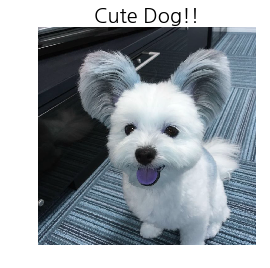

In [90]:
input_index = 23
pixels = data_insta2[input_index]
if label_insta[input_index] == 1:
    specie = "Dog"
else:
    specie = "Cat"
    
    
    
plt.title('Cute ' + specie + '!!',fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

In [105]:
predicted_labels=model.predict(data_insta)
predicted_labels=np.round(predicted_labels,decimals=2)
pred_labels=[1 if value>0.5 else 0 for value in predicted_labels]
pred_labels

[0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [114]:
data_conf
predicted_labels2=model.predict(data_conf)
predicted_labels2=np.round(predicted_labels2,decimals=2)
pred_labels2=[1 if value>0.5 else 0 for value in predicted_labels2]
pred_labels2

[1, 1, 1]

In [112]:
sum(pred_labels == label_insta)

20

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [23]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [29]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic', 'C:\\windows\\Fonts\\\x7f\x7f\x7f\x7f.TTF'),
 ('NanumGothic', 'c:\\windows\\fonts\\\x7f\x7f\x7f\x7fextrabold.ttf'),
 ('NanumGothic', 'C:\\windows\\Fonts\\\x7f\x7f\x7f\x7fEXTRABOLD.TTF'),
 ('NanumGothic', 'c:\\windows\\fonts\\\x7f\x7f\x7f\x7f.ttf'),
 ('NanumGothic', 'C:\\windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'),
 ('NanumGothic', 'c:\\windows\\fonts\\\x7f\x7f\x7f\x7fbold.ttf')]

In [62]:
range(0,20)

range(0, 20)

In [70]:
pred_labels[[2,1]]

TypeError: list indices must be integers or slices, not list

In [30]:
plt.rcParams["font.family"] = 'NanumGothic'

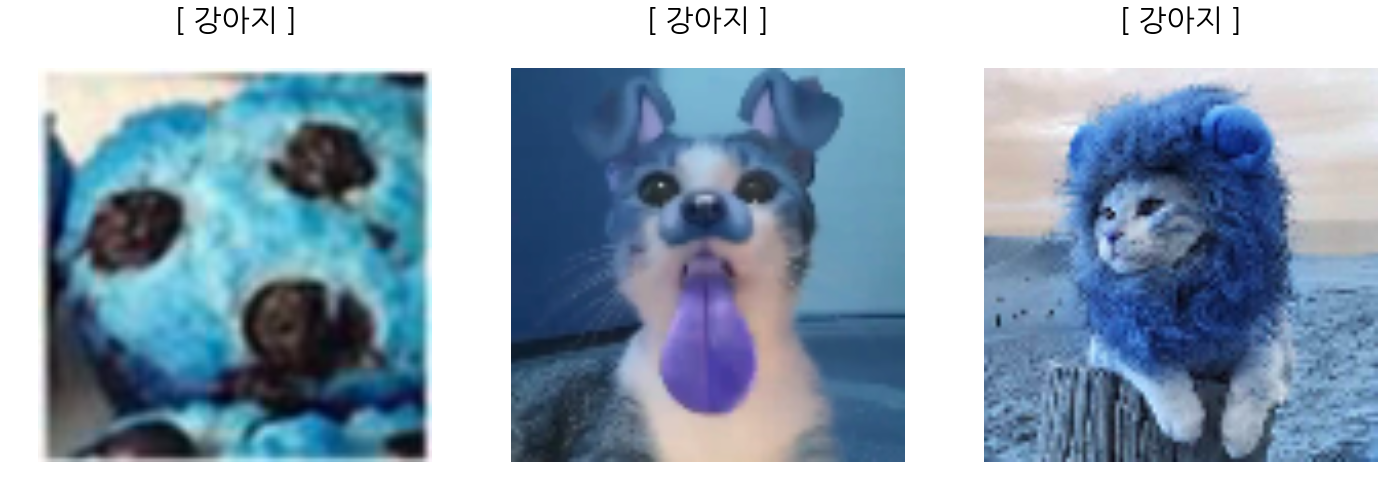

In [126]:
idxs = np.random.choice(range(0,3),3,replace=False)
fig = plt.figure(figsize=(24,12))
for position, idx in enumerate(idxs):
    position = position + 1
    pixels = data_conf2[idx]
    
    if pred_labels2[idx] == 1:
        specie = "[ 강아지 ]"
    else:
        specie = "[ 고양이 ]"
    plt.subplot(1,3,position)    
    plt.title(specie +"\n",fontsize = 30)
    plt.imshow(pixels)
    plt.axis('off')
plt.show()
fig.savefig("confusing_predictions.png")

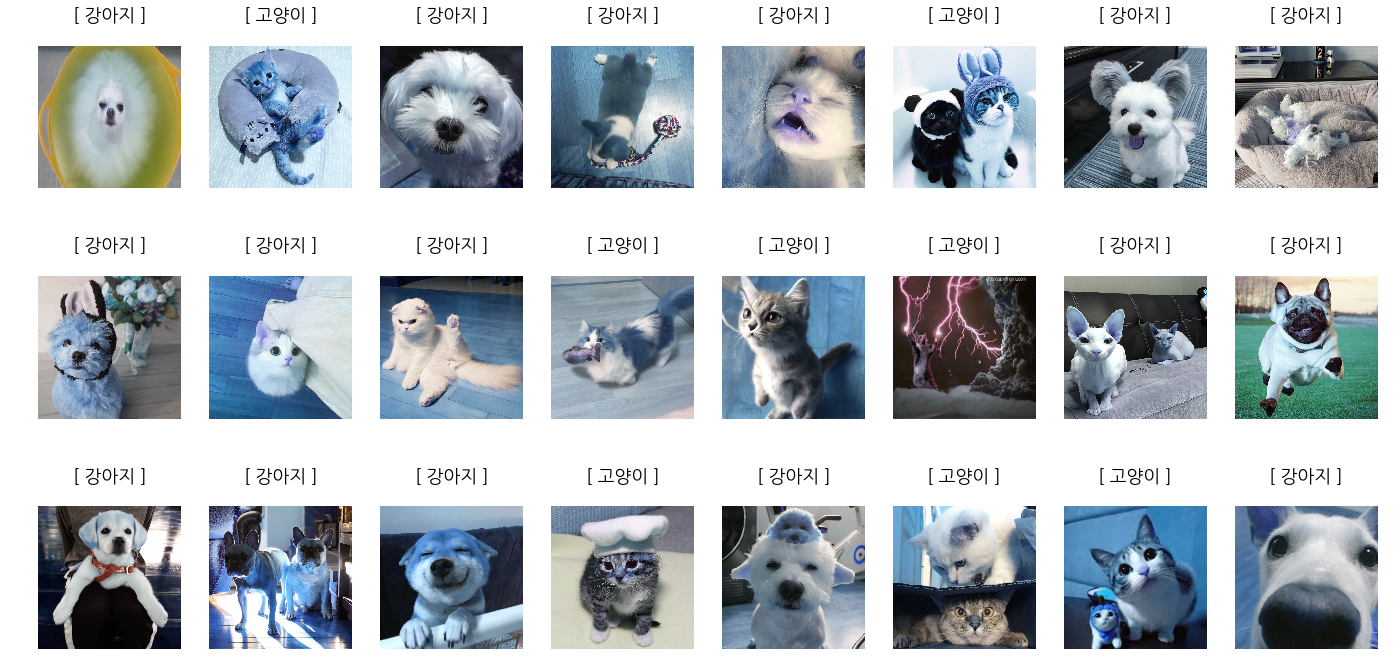

In [118]:
idxs = np.random.choice(range(0,24),24,replace=False)
fig = plt.figure(figsize=(24,12))
for position, idx in enumerate(idxs):
    position = position + 1
    pixels = data_insta2[idx]
    
    if pred_labels[idx] == 1:
        specie = "[ 강아지 ]"
    else:
        specie = "[ 고양이 ]"
    plt.subplot(3,8,position)    
    plt.title(specie +"\n",fontsize = 18)
    plt.imshow(pixels)
    plt.axis('off')
plt.show()
fig.savefig("insta_predictions.png")

prediction :  0


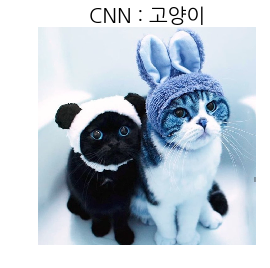

In [39]:
input_index = input("prediction : ")
input_index = int(input_index)

pixels = data_insta2[input_index]

if pred_labels[input_index] == 1:
    specie = "강아지"
else:
    specie = "고양이"
    
    
    
plt.title('CNN : '+ specie +"\n",fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

In [ ]:
hist10 = model10.fit(data1,label,validation_split=0.20,epochs=100,batch_size=64,callbacks=[early_stopping])
model10.save("cat_dog_classifier10.h5")

In [3]:
history9 = {'acc': [0.62455,
 0.625,
  0.625,
  0.625,
  0.6254,
  0.65825,
  0.7095,
  0.7367,
  0.76505,
  0.7854,
  0.80395,
  0.82845,
  0.84005,
  0.85245,
  0.8627,
  0.8759,
  0.88905,
  0.901,
  0.9074,
  0.91845,
  0.92585,
  0.93525,
  0.9407,
  0.94945,
  0.9546,
  0.95925,
  0.96445],
 'loss': [0.6652716460227966,
  0.6608627063751221,
  0.6544816286087036,
  0.6472249111175538,
  0.6345795873641967,
  0.6158651953697205,
  0.5754690985679627,
  0.5414362337112427,
  0.5030602715492248,
  0.46917386264801025,
  0.4372910182952881,
  0.4019609784126282,
  0.3714118550300598,
  0.3495927616596222,
  0.3255542668819427,
  0.2983571883201599,
  0.2673948649406433,
  0.24756200695037842,
  0.23284303846359253,
  0.20428863743543624,
  0.18960921121835708,
  0.16725372587442397,
  0.1550653187215328,
  0.13336780885457994,
  0.1196702330172062,
  0.1100950086146593,
  0.09579374040067196],
 'val_acc': [0.0,
  0.0,
  0.0,
  0.0,
  0.5108,
  0.3704,
  0.7742,
  0.798,
  0.5926,
  0.8362,
  0.4988,
  0.8638,
  0.8114,
  0.7166,
  0.8216,
  0.773,
  0.9416,
  0.8666,
  0.757,
  0.8428,
  0.699,
  0.8014,
  0.788,
  0.9096,
  0.7738,
  0.7624,
  0.773],
 'val_loss': [1.0160438488006591,
  0.9276315845489502,
  0.9715806602478028,
  1.2539190271377563,
  0.7977722152709961,
  0.8726460886001587,
  0.5184897560119629,
  0.46830774879455567,
  0.6967910764694214,
  0.34161382122039796,
  0.9040431764602661,
  0.3419952983856201,
  0.3899068377494812,
  0.5861581289291382,
  0.38794267835617063,
  0.494069415473938,
  0.1584942063808441,
  0.35082324924468994,
  0.6413410236358642,
  0.38585421314239504,
  0.9317435729980469,
  0.5724673669815064,
  0.677264661026001,
  0.25945532155036927,
  0.8429610311508179,
  1.0131104976654053,
  0.8841507804870605]}

In [39]:
hist9.history

{'acc': [0.62455,
  0.625,
  0.625,
  0.625,
  0.6254,
  0.65825,
  0.7095,
  0.7367,
  0.76505,
  0.7854,
  0.80395,
  0.82845,
  0.84005,
  0.85245,
  0.8627,
  0.8759,
  0.88905,
  0.901,
  0.9074,
  0.91845,
  0.92585,
  0.93525,
  0.9407,
  0.94945,
  0.9546,
  0.95925,
  0.96445],
 'loss': [0.6652716460227966,
  0.6608627063751221,
  0.6544816286087036,
  0.6472249111175538,
  0.6345795873641967,
  0.6158651953697205,
  0.5754690985679627,
  0.5414362337112427,
  0.5030602715492248,
  0.46917386264801025,
  0.4372910182952881,
  0.4019609784126282,
  0.3714118550300598,
  0.3495927616596222,
  0.3255542668819427,
  0.2983571883201599,
  0.2673948649406433,
  0.24756200695037842,
  0.23284303846359253,
  0.20428863743543624,
  0.18960921121835708,
  0.16725372587442397,
  0.1550653187215328,
  0.13336780885457994,
  0.1196702330172062,
  0.1100950086146593,
  0.09579374040067196],
 'val_acc': [0.0,
  0.0,
  0.0,
  0.0,
  0.5108,
  0.3704,
  0.7742,
  0.798,
  0.5926,
  0.8362,
  0

In [70]:
history_model1 = {}
history_model1['acc'] = hist.history['acc'] + hist2.history['acc']
history_model1['loss'] = hist.history['loss'] + hist2.history['loss']
history_model1['val_acc'] = hist.history['val_acc'] + hist2.history['val_acc']
history_model1['val_loss'] = hist.history['val_loss'] + hist2.history['val_loss']

In [85]:

import pickle


with open('history_model1.pickle', 'wb') as handle:
    pickle.dump(history_model1, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('history_model1.pickle', 'rb') as handle:
    b = pickle.load(handle)

    


True


In [114]:
with open('history_model2.pickle', 'wb') as handle:
    pickle.dump(hist.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('history_model2.pickle', 'rb') as handle:
    b = pickle.load(handle)


In [142]:
with open('history_model3.pickle', 'wb') as handle:
    pickle.dump(hist.history, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('history_model3.pickle', 'rb') as handle:
    b = pickle.load(handle)

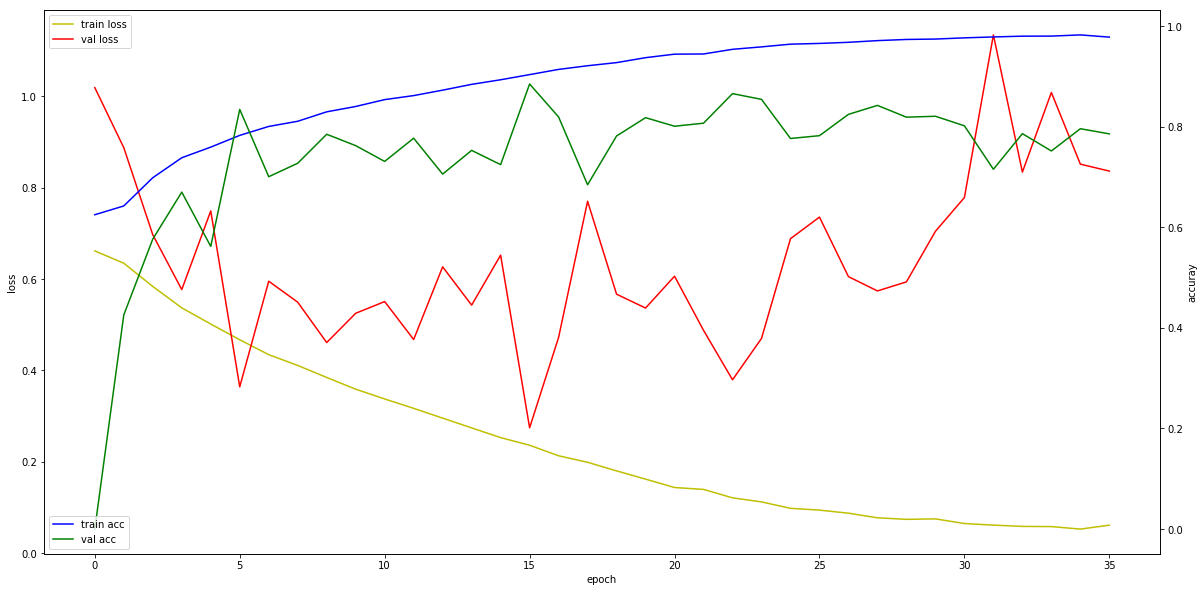

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (20,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(history_model1['loss'][:36], 'y', label='train loss')
loss_ax.plot(history_model1['val_loss'][:36], 'r', label='val loss')

acc_ax.plot(history_model1['acc'][:36], 'b', label='train acc')
acc_ax.plot(history_model1['val_acc'][:36], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
fig.savefig("history_model1.png")

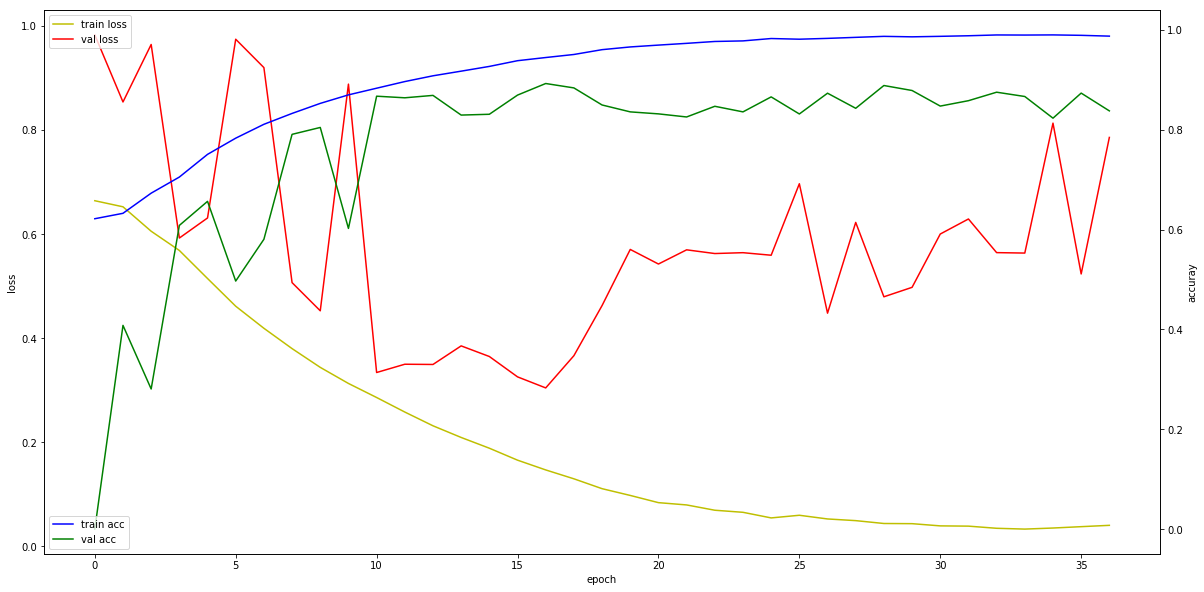

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (20,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
fig.savefig("history_model2.png")

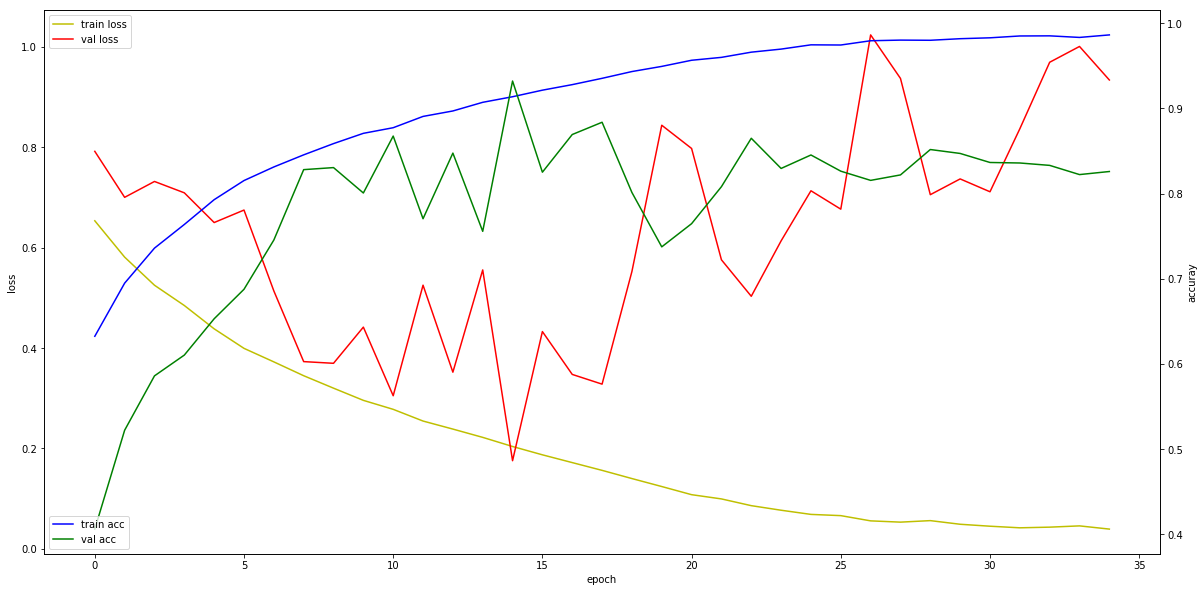

In [119]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (20,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist3.history['loss'][:36], 'y', label='train loss')
loss_ax.plot(hist3.history['val_loss'][:36], 'r', label='val loss')

acc_ax.plot(hist3.history['acc'][:36], 'b', label='train acc')
acc_ax.plot(hist3.history['val_acc'][:36], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
fig.savefig("history_model3.png")

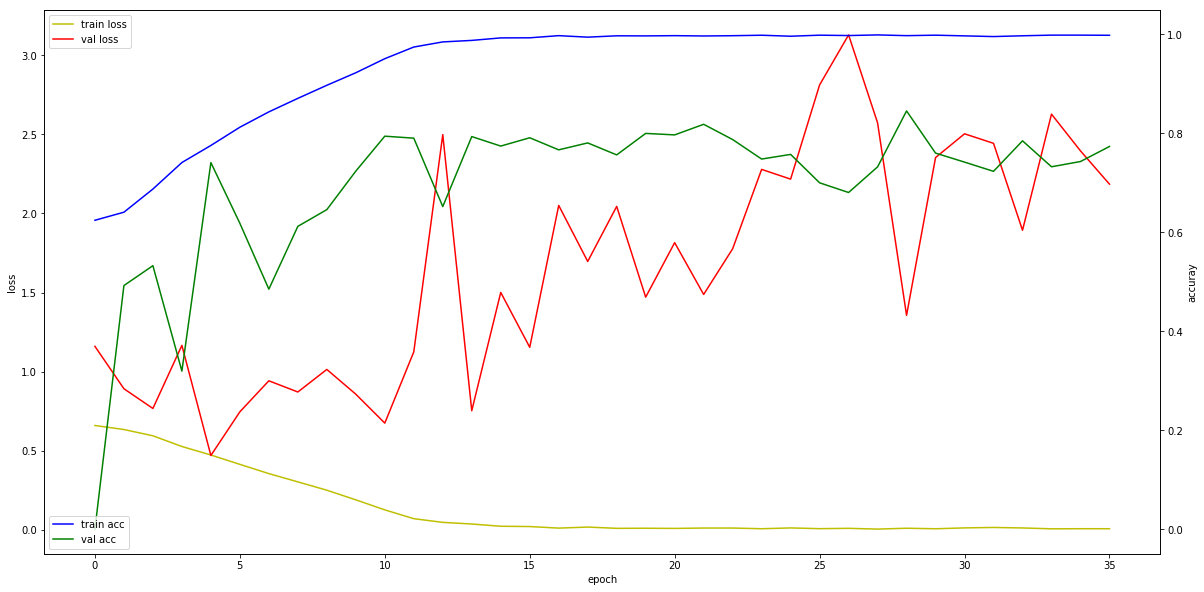

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (20,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist8.history['loss'][:36], 'y', label='train loss')
loss_ax.plot(hist8.history['val_loss'][:36], 'r', label='val loss')

acc_ax.plot(hist8.history['acc'][:36], 'b', label='train acc')
acc_ax.plot(hist8.history['val_acc'][:36], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
fig.savefig("history_model8.png")

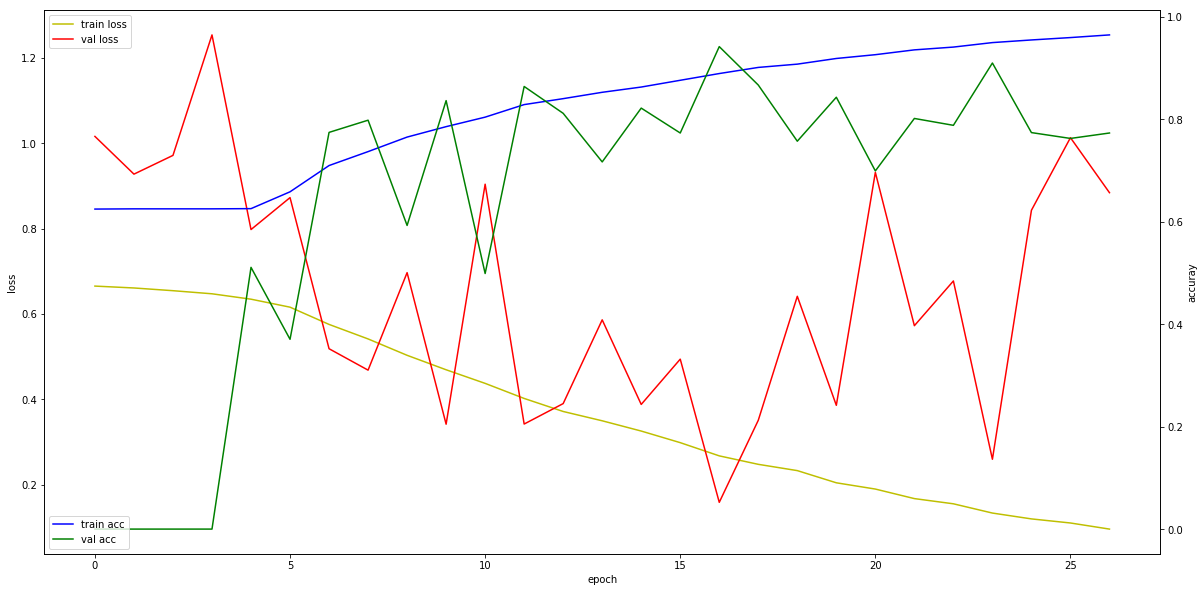

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (20,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(history9['loss'][:36], 'y', label='train loss')
loss_ax.plot(history9['val_loss'][:36], 'r', label='val loss')

acc_ax.plot(history9['acc'][:36], 'b', label='train acc')
acc_ax.plot(history9['val_acc'][:36], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
fig.savefig("history_model9.png")

In [67]:
hist10 = {"loss":[0.6070, 0.6008, 0.6002, 0.6002, 0.6002, 0.5996, 0.6001, 0.5995, 0.5996, 0.5995, 0.5996],
         "acc":[0.7143, 0.7143, 0.7143, 0.7143, 0.7143, 0.7143, 0.7143, 0.7143, 0.7143, 0.7143],
         "val_loss":[1.1636, 1.3083, 1.2777, 1.2909, 1.2226, 1.2562, 1.2748, 1.2231, 1.2661, 1.2395],
         "val_acc":[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

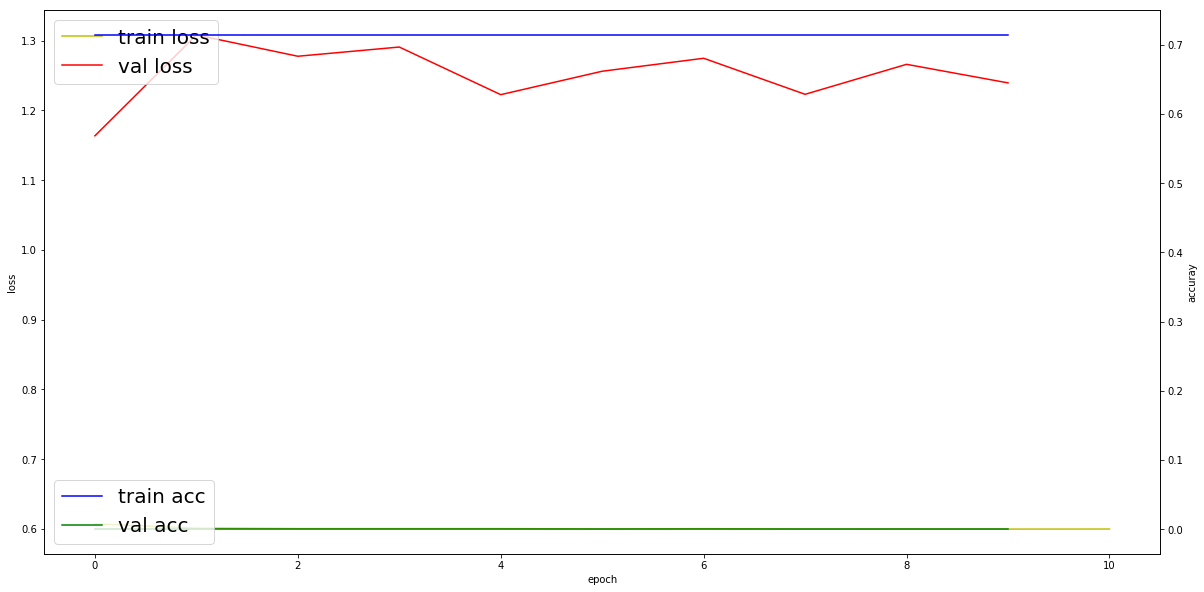

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (20,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist10['loss'], 'y', label='train loss')
loss_ax.plot(hist10['val_loss'], 'r', label='val loss')

acc_ax.plot(hist10['acc'], 'b', label='train acc')
acc_ax.plot(hist10['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left',prop={'size': 20})
acc_ax.legend(loc='lower left',prop={'size': 20})

plt.show()
fig.savefig("history_model10.png")

In [23]:
hist_model15 = {'acc': [0.6320000000045413,
  0.7406285714240302,
  0.793371428562346,
  0.8215238095328922,
  0.842266666671208,
  0.857733333328792,
  0.8756380952471778,
  0.8849142857097444,
  0.8966857142811729,
  0.9052380952290127,
  0.913314285718827,
  0.9191047619047619,
  0.9304761904761905,
  0.9348380952380952,
  0.9415619047664461,
  0.9470095238186064,
  0.9490285714285714,
  0.9542476190385364,
  0.9547619047619048],
 'loss': [0.6369149319103786,
  0.5242227814401899,
  0.44308873001280286,
  0.39260402619952245,
  0.35312499271120346,
  0.3211731590679714,
  0.2880026733852568,
  0.2659519109771365,
  0.24266826742603664,
  0.22222500436646597,
  0.20566266726312182,
  0.19033170413800649,
  0.16978263654822395,
  0.157445650158042,
  0.14161976262274242,
  0.1319039379415058,
  0.12303063579542296,
  0.11491372579847063,
  0.1120703276111966],
 'val_acc': [0.7002222221904331,
  0.7723111110899183,
  0.7823555555767483,
  0.8079555555449591,
  0.8265777777459886,
  0.830933333322737,
  0.8385777777459886,
  0.8537777777459886,
  0.8577777778095669,
  0.8612000000105964,
  0.8561777777671814,
  0.8610666666348775,
  0.8542222222116258,
  0.8498666666560702,
  0.85164444448683,
  0.8519999999682109,
  0.8568444444338481,
  0.860444444433848,
  0.8583555555873447],
 'val_loss': [0.577506806702084,
  0.47815661917792424,
  0.45866961294809977,
  0.41762024992836844,
  0.37478406326505875,
  0.3670978160222371,
  0.3558697691599528,
  0.33063659614457025,
  0.3182559608777364,
  0.32230873620775013,
  0.3331246715068817,
  0.331320674917433,
  0.3426280134148068,
  0.37052951510747273,
  0.3904920951472388,
  0.4170693373998006,
  0.377108469470342,
  0.4098053725348579,
  0.44396775922775267]}

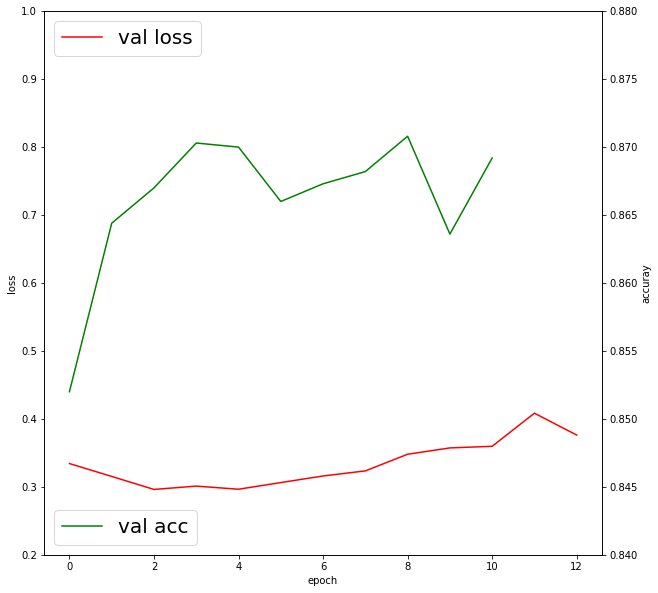

In [32]:
%matplotlib inline

fig, loss_ax = plt.subplots(figsize = (10,10))

acc_ax = loss_ax.twinx()

#loss_ax.plot(history15_2['loss'], 'y', label='train loss')
loss_ax.plot(history15_2['val_loss'], 'r', label='val loss')
loss_ax.set_ylim(0.2,1)
#acc_ax.plot(history15_2['acc'], 'b', label='train acc')
acc_ax.plot(history15_2['val_acc'], 'g', label='val acc')
acc_ax.set_ylim(0.84,0.88)

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left',prop={'size': 20})
acc_ax.legend(loc='lower left',prop={'size': 20})

plt.show()
fig.savefig("history_model15_2.png")


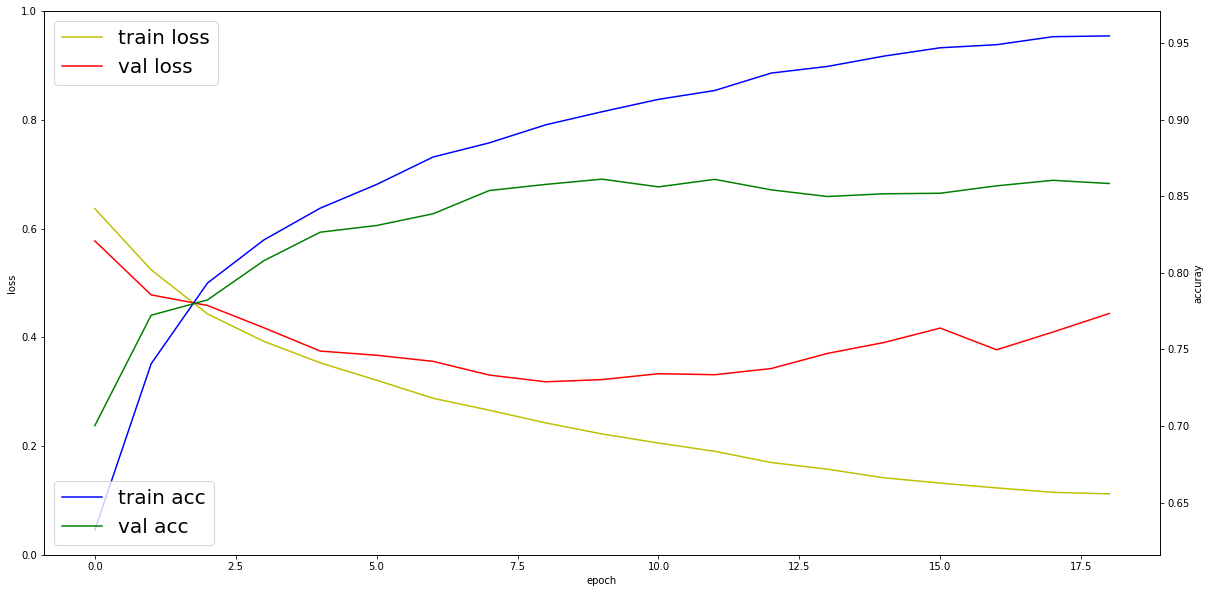

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (20,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_model15['loss'], 'y', label='train loss')
loss_ax.plot(hist_model15['val_loss'], 'r', label='val loss')
loss_ax.set_ylim(0,1)
acc_ax.plot(hist_model15['acc'], 'b', label='train acc')
acc_ax.plot(hist_model15['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left',prop={'size': 20})
acc_ax.legend(loc='lower left',prop={'size': 20})

plt.show()
fig.savefig("history_model15.png")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize = (20,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist_model15['loss'], 'y', label='train loss')
loss_ax.plot(hist_model15['val_loss'], 'r', label='val loss')
loss_ax.set_ylim(0,1)
acc_ax.plot(hist_model15['acc'], 'b', label='train acc')
acc_ax.plot(hist_model15['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left',prop={'size': 20})
acc_ax.legend(loc='lower left',prop={'size': 20})

plt.show()
fig.savefig("history_model15.png")

In [ ]:
# 모델 불러오기

from keras.models import load_model
model = load_model("cat_dog_classifier.h5")

In [74]:
tfpath = "./data/test2"
tlength = len(os.listdir(tfpath))
test_data=[]
id=[]
count=0
for file in os.listdir(tfpath):
    image_data=cv2.imread(os.path.join(tfpath,file))
    try:
        image_data=cv2.resize(image_data,(96,96))
        test_data.append(image_data/255)
        id.append((file.split("."))[0])
    except:
        print ("ek gaya")
    count+=1
    if count%(tlength/1) == 0:
        print(count, " image data retreived (", round(count/tlength*100,2), "% done )")
        
print('complete!!')

8  image data retreived ( 100.0 % done )
complete!!


In [75]:
test_data1=np.array(test_data)
print (test_data1.shape)
test_data1=test_data1.reshape((test_data1.shape)[0],(test_data1.shape)[1],(test_data1.shape)[2],3)

(8, 96, 96, 3)


In [19]:
model

In [20]:
# 2. 모델 불러오기
from keras.models import load_model
model.load_weights("model.h5")

In [76]:
input_index = input("prediction : ")
input_index = int(input_index)

pixels = test_data1[input_index]

if labels[input_index] == 1:
    specie = "Dog"
else:
    specie = "Cat"
    
    
    
plt.title('CNN predicted that it is ' + specie + '!!',fontsize = 20)
plt.imshow(pixels)
plt.axis('off')
plt.show()

prediction :  1


NameError: name 'labels' is not defined

In [121]:
# 2. 모델 불러오기
from keras.models import load_model
model= load_model("cat_dog_classifier.h5")

In [117]:
predicted_labels

array([[0.  ],
       [1.  ],
       [1.  ],
       [1.  ],
       [0.99],
       [0.  ],
       [0.  ],
       [0.96]], dtype=float32)

In [115]:
predicted_labels=model2.predict(test_data1)
predicted_labels=np.round(predicted_labels,decimals=2)
labels=[1 if value>0.5 else 0 for value in predicted_labels]
labels

[0, 1, 1, 1, 1, 0, 0, 1]

In [23]:
right = []
for i in range(len(labels)):
    right.append(labels[i]==answer[i])
sum(right)/len(right)
    

0.75

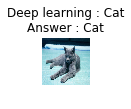

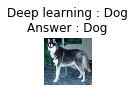

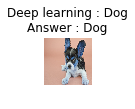

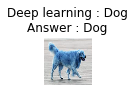

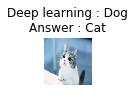

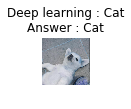

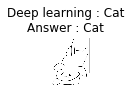

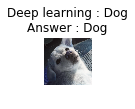

In [116]:
for input_index in range(0,8):
    pixels = test_data1[input_index]
    
    if labels[input_index] == 1:
        specie = "Dog"
    else:
        specie = "Cat"
    if answer[input_index] == 1:
        specieA = "Dog"
    else:
        specieA = "Cat"
    i = input_index + 1
    plt.subplot(4,2,i)    
    plt.title('Deep learning : ' + specie +  '\nAnswer : ' + specieA)
    plt.imshow(pixels)
    plt.axis('off')
    plt.show()

In [140]:
model

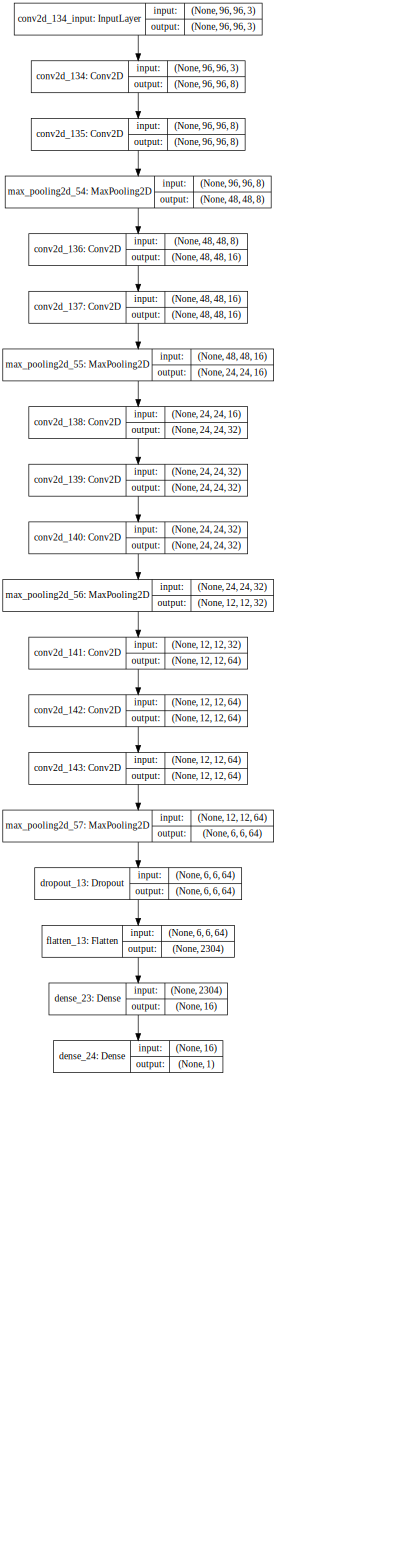

In [141]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True,dpi = 50).create(prog='dot', format='svg'))

In [127]:
# 2. 모델 불러오기
from keras.models import load_model
model= load_model("cat_dog_classifier15_2.h5")

In [129]:
print('1')

1


In [128]:
tfpath = "./data/test1"
tlength = len(os.listdir(tfpath))
test_data=[]
id=[]
counter=0
for file in os.listdir(tfpath):
    image_data=cv2.imread(os.path.join(tfpath,file))
    try:
        image_data=cv2.resize(image_data,(96,96))
        test_data.append(image_data/255)
        id.append((file.split("."))[0])
    except:
        print ("ek gaya")
    counter+=1
    if count%(tlength/20) == 0:
        print(count, " image data retreived (", round(count/length*100,2), "% done )")
        
print('complete!!')

complete!!


In [131]:
test_data1=np.array(test_data)
print (test_data1.shape)
test_data1=test_data1.reshape((test_data1.shape)[0],(test_data1.shape)[1],(test_data1.shape)[2],3)

(12500, 96, 96, 3)


In [145]:
predicted_labels=model.predict(test_data1)
predicted_labels2=np.round(predicted_labels,decimals=2)
labels=[1 if value>0.5 else 0 for value in predicted_labels]

In [146]:
df_submission = pd.DataFrame(predicted_labels)
df_submission = df_submission.reset_index()
df_submission.columns = ['id','label']
df_submission.id = df_submission.id + 1

In [147]:
df_submission.to_csv("./data/submission.csv",index=False)

In [ ]:
from PIL import Image
im = Image.open("1.jpg")
nx, ny = im.size
im2 = im.resize((int(nx*1.5), int(ny*1.5)), Image.BICUBIC)
im2.save("2.png")

In [ ]:
tfpath2 = "./data/test2"
tlength2 = len(os.listdir(tfpath2))
test_data2=[]
id2=[]
count=0
for file in os.listdir(tfpath2):
    image_data=cv2.imread(os.path.join(tfpath2,file))
    try:
        image_data2=cv2.resize(image_data2,(96,96))
        test_data2.append(image_data2/255)
        id2.append((file.split("."))[0])
    except:
        print ("ek gaya")
    counter+=1
    if count%(tlength/20) == 0:
        print(count, " image data retreived (", round(count/length*100,2), "% done )")
        
print('complete!!')